<h1> Netflix Data Analysis</h1>
<br>
<b>by Bharath G</b>
<br><br>
<p>The analyzed data is part of the statistics 2 course offered by IITM.</p>

In [65]:
import pandas as pd
import plotly.express as px
data_import = pd.read_csv('netflix_titles.csv', date_parser=['date_added'])
#hello

In [66]:
#changing the date to a more machine-readable format

data_import['date_added'] = pd.to_datetime(data_import['date_added'].str.strip(), format="%B %d, %Y")
data_import

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Data Types

In [21]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Measures of central tendancy on Numerical Comlums

In [23]:
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Date Analysis

<AxesSubplot:>

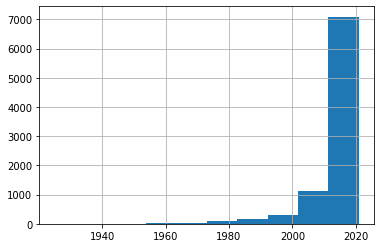

In [30]:
data_import['release_year'].hist() # Matplotlib version

In [33]:
px.histogram(data_import, x='release_year') # Plotly Method

<AxesSubplot:>

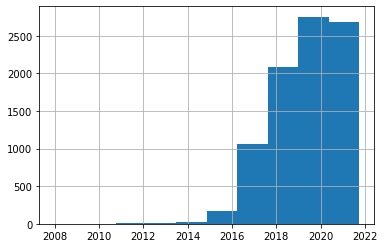

In [34]:
data_import['date_added'].hist() # Matplotlib Version

## Extract Month from date_added

In [73]:
data_import['date_added_month'] = data_import['date_added'].dt.month.fillna(0)
data_import['date_added_day'] = data_import['date_added'].dt.day.fillna(0)

In [46]:
px.histogram(data_import, x='date_added', color='date_added_month') # Histogram of Dates

In [47]:
px.histogram(data_import, x='date_added_month', color='date_added_month') # Histogram of Months

In [74]:
px.histogram(data_import, x='date_added_day', color='type') 

## Aha! Netflix adds more TV Shows and Movies on the first of the month than any other day, and we have another small spike around the middle of the month

### Almost 3/4 of the additions are movies and the other 1/4 is TV Shows

In [50]:
px.histogram(data_import, x='type') # Netflix has more movies than TV Shows

In [52]:
px.histogram(data_import, x='release_year', color='type') # Histogram of Dates

TV Shows have gained tremondous popylarity since around 2015. Entertainment industry as a whole has also gained a lot of traction in the past decade.

In [76]:
data_import['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin